# Minor Project : IS6C06

###### Social media has gained immense popularity and has become a major global platform to stay connected as well as express opinions. 
A huge amount of content is created on various topics and comments are posted on these platforms daily. 
The feedback received on a certain piece of content can be either negative or positive. 
Other than this, receiving negative feedback, on various occasions might affect the mental health of the content creators and, in some cases, might also lead to cyberbullying.
Social media is a necessity in today’s time to stay connected, informed, and relevant and therefore such issues must be tackled.
Schmaltz refers to excessive sentimentality. Therefore this project has been named Schmaltz Surveyor, which aims to analyze the sentiments expressed by Twitter users.

Sentimental Analysis reads people’s sentiments or emotions towards particular things or topics. 
Sentiment analysis is a machine learning tool that will help analyze and categorize the texts as positive or negative. 

## Importing the Modules

In [2]:
#import the libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
from IPython.display import display,HTML 
warnings.filterwarnings('ignore')

## Loading the Dataset

In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,label,tweet,clean_tweet
0,1,1,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,1,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause ...
2,3,1,bihday your majesty,bihday your majesty
3,4,1,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,1,factsguide: society now #motivation,factsguide: society now motivation


In [5]:
df['label'] = df['label'].apply(lambda x:0 if x == 1 else 1)
print(df)

          id  label                                              tweet  \
0          1      1   @user when a father is dysfunctional and is s...   
1          2      1  @user @user thanks for #lyft credit i can't us...   
2          3      1                                bihday your majesty   
3          4      1  #model   i love u take with u all the time in ...   
4          5      1             factsguide: society now    #motivation   
...      ...    ...                                                ...   
31947  31958      1  ate @user isz that youuu?ðððððð...   
31948  31959      1    to see nina turner on the airwaves trying to...   
31949  31960      1  listening to sad songs on a monday morning otw...   
31950  31961      0  @user #sikh #temple vandalised in in #calgary,...   
31951  31962      1                   thank you @user for you follow     

                                             clean_tweet  
0         when a father is dysfunctional and is so s

In [7]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31952 entries, 0 to 31951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           31952 non-null  int64 
 1   label        31952 non-null  int64 
 2   tweet        31952 non-null  object
 3   clean_tweet  31952 non-null  object
dtypes: int64(2), object(2)
memory usage: 998.6+ KB


## Preprocessing Data

In [8]:
values_list=list()
cols_list=list()
for col in df.columns:
    missing=df[col].isnull()
    cols_list.append(col)
    values_list.append(missing)
missing_df = pd.DataFrame()
missing_df['col'] = cols_list
missing_df['missing'] = values_list
display(HTML(missing_df.to_html()))

df=df.dropna(how='any',axis=0)
df.shape
print(df)



,col,missing
0,id,"0 False 1 False 2 False 3 False 4 False ... 31947 False 31948 False 31949 False 31950 False 31951 False Name: id, Length: 31952, dtype: bool"
1,label,"0 False 1 False 2 False 3 False 4 False ... 31947 False 31948 False 31949 False 31950 False 31951 False Name: label, Length: 31952, dtype: bool"
2,tweet,"0 False 1 False 2 False 3 False 4 False ... 31947 False 31948 False 31949 False 31950 False 31951 False Name: tweet, Length: 31952, dtype: bool"
3,clean_tweet,"0 False 1 False 2 False 3 False 4 False ... 31947 False 31948 False 31949 False 31950 False 31951 False Name: clean_tweet, Length: 31952, dtype: bool"


          id  label                                              tweet  \
0          1      1   @user when a father is dysfunctional and is s...   
1          2      1  @user @user thanks for #lyft credit i can't us...   
2          3      1                                bihday your majesty   
3          4      1  #model   i love u take with u all the time in ...   
4          5      1             factsguide: society now    #motivation   
...      ...    ...                                                ...   
31947  31958      1  ate @user isz that youuu?ðððððð...   
31948  31959      1    to see nina turner on the airwaves trying to...   
31949  31960      1  listening to sad songs on a monday morning otw...   
31950  31961      0  @user #sikh #temple vandalised in in #calgary,...   
31951  31962      1                   thank you @user for you follow     

                                             clean_tweet  
0         when a father is dysfunctional and is so s

In [9]:
df.head()

,id,label,tweet,clean_tweet
0,1,1,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,1,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause ...
2,3,1,bihday your majesty,bihday your majesty
3,4,1,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,1,factsguide: society now #motivation,factsguide: society now motivation


### Text Normalization

In [10]:
df['tweet']=df['tweet'].str.lower()
df.to_csv("train.csv",index=False)
print(df)

          id  label                                              tweet  \
0          1      1   @user when a father is dysfunctional and is s...   
1          2      1  @user @user thanks for #lyft credit i can't us...   
2          3      1                                bihday your majesty   
3          4      1  #model   i love u take with u all the time in ...   
4          5      1             factsguide: society now    #motivation   
...      ...    ...                                                ...   
31947  31958      1  ate @user isz that youuu?ðððððð...   
31948  31959      1    to see nina turner on the airwaves trying to...   
31949  31960      1  listening to sad songs on a monday morning otw...   
31950  31961      0  @user #sikh #temple vandalised in in #calgary,...   
31951  31962      1                   thank you @user for you follow     

                                             clean_tweet  
0         when a father is dysfunctional and is so s

In [11]:
def cleanText(text):
    text=re.sub(r'@[A-Za-z0-9]+',' ',text) #removed @ mentions
    text=re.sub(r'#',' ', text)#removing # sympbol
    text=re.sub(r'RT[\s]+',' ', text) #removing RT
    text=re.sub(r'https?:\/\/\S+',' ',text) #removing hyperlinks
    text=re.sub(r'[^\x00-\x7F]+',' ', text)
    return text 

df['clean_tweet']=df['tweet'].apply(cleanText) 
print(df)   

          id  label                                              tweet  \
0          1      1   @user when a father is dysfunctional and is s...   
1          2      1  @user @user thanks for #lyft credit i can't us...   
2          3      1                                bihday your majesty   
3          4      1  #model   i love u take with u all the time in ...   
4          5      1             factsguide: society now    #motivation   
...      ...    ...                                                ...   
31947  31958      1  ate @user isz that youuu?ðððððð...   
31948  31959      1    to see nina turner on the airwaves trying to...   
31949  31960      1  listening to sad songs on a monday morning otw...   
31950  31961      0  @user #sikh #temple vandalised in in #calgary,...   
31951  31962      1                   thank you @user for you follow     

                                             clean_tweet  
0         when a father is dysfunctional and is so s

In [12]:
#individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, lyft, credit, i, can't, use, cau...
2                              [bihday, your, majesty]
3    [model, i, love, u, take, with, u, all, the, t...
4              [factsguide:, society, now, motivation]
Name: clean_tweet, dtype: object

### Lemmatization

In [13]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, lyft, credit, i, can't, use, caus...
2                              [bihday, your, majesti]
3    [model, i, love, u, take, with, u, all, the, t...
4                   [factsguide:, societi, now, motiv]
Name: clean_tweet, dtype: object

In [14]:
#combine the words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])
df['clean_tweet']=tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,1,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...
1,2,1,@user @user thanks for #lyft credit i can't us...,thank for lyft credit i can't use caus they do...
2,3,1,bihday your majesty,bihday your majesti
3,4,1,#model i love u take with u all the time in ...,model i love u take with u all the time in ur !!!
4,5,1,factsguide: society now #motivation,factsguide: societi now motiv


### Removal of Stop Words

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ppradyoth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
df['clean_tweet']=df['clean_tweet'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))
print(df)

          id  label                                              tweet  \
0          1      1   @user when a father is dysfunctional and is s...   
1          2      1  @user @user thanks for #lyft credit i can't us...   
2          3      1                                bihday your majesty   
3          4      1  #model   i love u take with u all the time in ...   
4          5      1             factsguide: society now    #motivation   
...      ...    ...                                                ...   
31947  31958      1  ate @user isz that youuu?ðððððð...   
31948  31959      1    to see nina turner on the airwaves trying to...   
31949  31960      1  listening to sad songs on a monday morning otw...   
31950  31961      0  @user #sikh #temple vandalised in in #calgary,...   
31951  31962      1                   thank you @user for you follow     

                                             clean_tweet  
0      father dysfunct selfish drag hi kid hi dysfun

## Exploratory Data Analysis

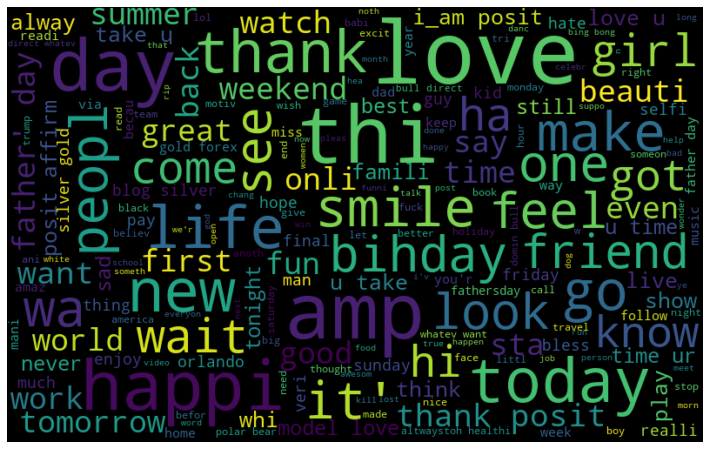

In [17]:
# general frequent word visualization
from wordcloud import WordCloud
all_words = " ".join([sentence for sentence in df['clean_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

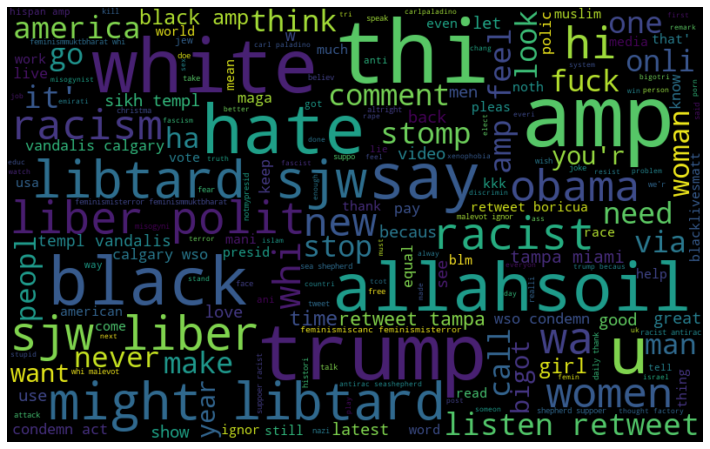

In [18]:
#frequent word visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

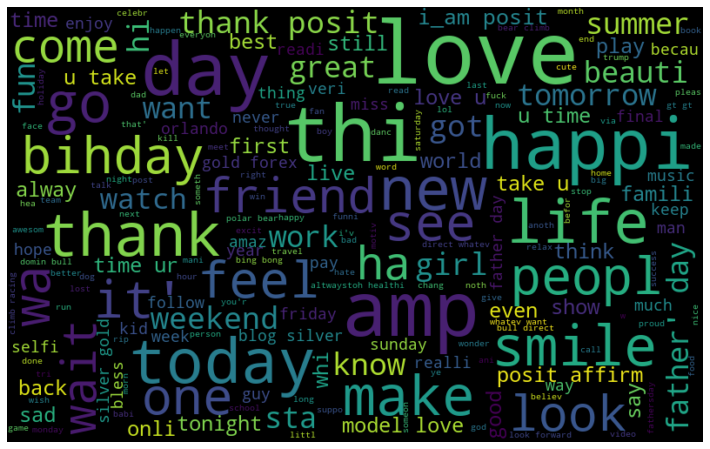

In [19]:
#frequent word visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Using SVM

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix

In [21]:
x=df['clean_tweet']
y=df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.5, random_state=55)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [22]:
from sklearn import svm
#params = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100]}
svcl = svm.SVC(kernel = 'rbf')
#clf_sv = GridSearchCV(svcl, params)
svcl.fit(X_train_vec, y_train)
svcl_score = svcl.score(X_test_vec, y_test)
print("Results for Support Vector Machine with tfidf")
print(svcl_score)

Results for Support Vector Machine with tfidf
0.9518027040560841


In [23]:
y_pred_sv = svcl.predict(X_test_vec)
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm_sv = confusion_matrix(y_test, y_pred_sv)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sv).ravel()
print(tn, fp, fn, tp)
tpr_sv = round(tp/(tp + fn), 4)
tnr_sv = round(tn/(tn+fp), 4)
print(tpr_sv, tnr_sv)

406 742 28 14800
0.9981 0.3537


## Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=45)
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [26]:
lr.fit(X_train_vec, y_train)
lr_score = lr.score(X_test_vec, y_test)
print("Results for Logistic Regression with tfidf")
print(lr_score)
y_pred_lr = lr.predict(X_test_vec)

Results for Logistic Regression with tfidf
0.9459814722083125


In [27]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print(tn, fp, fn, tp)
tpr_lr = round(tp/(tp + fn), 4)
tnr_lr = round(tn/(tn+fp), 4)
print(tpr_lr, tnr_lr)

280 845 18 14833
0.9988 0.2489


# k Nearest Neighbours

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix
X = df['clean_tweet']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=65)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)
knn_score = knn.score(X_test_vec, y_test)
print("Results for KNN Classifier with tfidf")
print(knn_score)
y_pred_knn = knn.predict(X_test_vec)

Results for KNN Classifier with tfidf
0.9457936905358038


In [30]:
#Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
print(tn, fp, fn, tp)
tpr_knn = round(tp/(tp + fn), 4)
tnr_knn = round(tn/(tn+fp), 4)
print(tpr_knn, tnr_knn)

288 830 36 14822
0.9976 0.2576


## Random Forest Model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix
X = df['clean_tweet']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=65)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier
test_classifier= RandomForestClassifier(n_estimators=200,random_state=0)
test_classifier.fit(X_train_vec,y_train)
predictions = test_classifier.predict(X_test_vec)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Results for Random Forest with tfidf")
rf_score = accuracy_score(y_test, predictions)
print(rf_score)
test_classifier

[[  522   596]
 [   66 14792]]
              precision    recall  f1-score   support

           0       0.89      0.47      0.61      1118
           1       0.96      1.00      0.98     14858

    accuracy                           0.96     15976
   macro avg       0.92      0.73      0.80     15976
weighted avg       0.96      0.96      0.95     15976

Results for Random Forest with tfidf
0.9585628442663996


RandomForestClassifier(n_estimators=200, random_state=0)

In [34]:
#Confusion matrix
text_classifier = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tn, fp, fn, tp)
tpr_knn = round(tp/(tp + fn), 4)
tnr_knn = round(tn/(tn+fp), 4)
print(tpr_knn, tnr_knn)

522 596 66 14792
0.9956 0.4669


## Result Comparison between Models used

In [35]:
print("Results for Support Vector Machine with tfidf")
print(svcl_score)
print("Results for KNN Classifier with tfidf")
print(knn_score)
print("Results for Logistic Regression with tfidf")
print(lr_score)
print("Results for Random Forest with tfidf")
print(rf_score)
print("Therefore, Random Forest gives us maximum accuracy of ")
print(max(svcl_score, knn_score, lr_score, rf_score))

Results for Support Vector Machine with tfidf
0.9518027040560841
Results for KNN Classifier with tfidf
0.9457936905358038
Results for Logistic Regression with tfidf
0.9459814722083125
Results for Random Forest with tfidf
0.9585628442663996
Therefore, Random Forest gives us maximum accuracy of 
0.9585628442663996


# Exporting the model for backend usage

In [36]:
import pickle
with open('classifier.pickle', 'wb') as f:
    pickle.dump(test_classifier, f)


In [37]:
print("Now over to the web app!")

Now over to the web app!


### Misc 

In [38]:
df1=df

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix
X = df['clean_tweet']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=65)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from numpy import sqrt
test_classifier1= RandomForestClassifier(n_estimators=50,random_state=0,max_features=6000)
test_classifier1.fit(X_train_vec,y_train)
predictions = test_classifier1.predict(X_test_vec)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Results for Random Forest with tfidf")
rf_score = accuracy_score(y_test, predictions)
print(rf_score)
test_classifier1

[[  618   500]
 [  248 14610]]
              precision    recall  f1-score   support

           0       0.71      0.55      0.62      1118
           1       0.97      0.98      0.98     14858

    accuracy                           0.95     15976
   macro avg       0.84      0.77      0.80     15976
weighted avg       0.95      0.95      0.95     15976

Results for Random Forest with tfidf
0.9531797696544817


RandomForestClassifier(max_features=6000, n_estimators=50, random_state=0)

In [53]:
import pickle
with open('randomforest.pickle', 'wb') as f:
    pickle.dump(test_classifier1, f)
